In [1]:
import pandas as pd
import os

def load_diamond_data():
    csv_path = os.path.join("diamonds-dataset", "diamonds-train.csv")
    return pd.read_csv(csv_path)

In [2]:
#Carrega os dados de treino e faz feature scaling(depth, table)
import numpy as np
diamond_data = load_diamond_data()
diamond_data["depth"] = (diamond_data["depth"] / 10)
diamond_data["table"] = (diamond_data["table"] / 10)

In [3]:
#dummy coding(cut,color,clarity)
from sklearn.preprocessing import LabelEncoder
diamond_data = load_diamond_data()
diamond_data["depth"] = diamond_data["depth"] / 10
diamond_data["table"] = diamond_data["table"] / 10

enumValues = {"cut": {"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4},
              "color": {"J": 0, "I":1, "H":2, "G":3, "F":4, "E":5, "D":6},
              "clarity": {"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4,"VVS2":5, "VVS1":6, "IF":7}}
diamond_data.replace(enumValues, inplace=True)


In [4]:
# Normal Equation

def NormalEquation(X, y):

    transpose = X.T

    mult1 = transpose.dot(X)

    try:
        inverse = np.linalg.inv(mult1)

    except np.linalg.LinAlgError:
        print("Not invertible")
        return np.zeros(1,1)

    else:
        mult2 = (inverse.dot(transpose)).dot(y)
        return mult2


In [5]:
import numpy as np

#function add a first column filled with 1's and delete de last colum
def prepareSet(setToPrepare):
    X = np.array(setToPrepare)

    X = np.delete(X, -1, axis=1)

    X = np.c_[np.ones((len(X), 1)),X]

    y = np.array(setToPrepare["price"])

    return X,y

In [6]:
# #grafico Carat X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["carat"], diamond_data["price"])
# plt.xlabel("$carat$", fontsize=18)
# plt.ylabel("$price(U$)$", fontsize=18)
# plt.show()

In [7]:
# #grafico Cut X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["cut"], diamond_data["price"])
# plt.xlabel("$cut$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [8]:
# #grafico  Color X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["color"], diamond_data["price"])
# plt.xlabel("$color$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [9]:
# #grafico Clarity X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["clarity"], diamond_data["price"])
# plt.xlabel("$clarity$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [10]:
# #grafico Depth X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["depth"], diamond_data["price"])
# plt.xlabel("$depth$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [11]:
# #grafico table X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["table"], diamond_data["price"])
# plt.xlabel("$table$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [12]:
# #grafico x X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["x"], diamond_data["price"])
# plt.xlabel("$x$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [13]:
# #grafico y X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["y"], diamond_data["price"])
# plt.xlabel("$y$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [14]:
# #grafico z X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["z"], diamond_data["price"])
# plt.xlabel("$z$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [15]:
# Cross Validation Generation

# PRECISA CHAMAR ISSO ANTES DE CHAMAR A FUNCAO --- 
#                             TRAINING_DATA = prepareSet(diamond_data) 

from sklearn.model_selection import train_test_split, KFold

#essa funcao retorna um gerador de indices
def generate_sets(TRAINING_DATA,type='kfold'):

    # Cross validation using train_test_split
    if (type == 'split'):
       return train_test_split(TRAINING_DATA,test_size=0.2,random_state=0)

    # Cross validation using K-Fold
    # K = 5, Shuffle = true, Seed = 21
    elif (type == 'kfold'):
        kfold_seed = 21

        kfold = KFold(n_splits=5, shuffle=True, random_state=kfold_seed)
        return kfold.split(TRAINING_DATA)

## Explicação do uso do generate_sets

In [16]:

# import numpy as np
# from sklearn.model_selection import train_test_split, KFold

# X = np.array([[10, 20], [30, 40], [50, 60], [70, 80], [90, 100], [110, 120], [130, 140], [150, 160], [170, 180], [190, 200]])
# y = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

# #esse b vai ser um gerador, não precisa passar y pois ele gera somente os indices
# b = generate_sets(X)

# #precisa percorrer ele com 2 indices, um representa o treino, outro o test, 
# # na proxima iteracao ele ja vai estar num agrupamento diferente
# for train_index, val_index in b:
#     x_train = X[train_index]
#     y_train = y[train_index]
#     x_val = X[val_index]
#     y_val = y[val_index]
#     print(x_train, y_train)
#     print(x_val, y_val)
#     print("-----")
    


In [17]:
# #Scikit-Learn Linear Regression using Stochastic Gradient Descent(SGD) for comparisson
# from sklearn.linear_model import SGDRegressor
# sgd_reg = SGDRegressor(max_iter = 100, eta0=0.1)
# sgd_reg.fit(X_train, y_train)
# sgd_reg.intercept_, sgd_reg.coef_


In [18]:
# for train_index, validate_index in generate_sets():
#     X_train, X_test = X[train_index], X[validate_index]
#     y_train, y_test = y[train_index], y[validate_index]
#     print(LinRegBatchGradientDescent(X_train,y_train.reshape(len(y_train),1),100,0.1))

In [19]:
def learning_schedule(t):
    return t0 / (t + t1)
#TODO
#implementation Linear Regression using Stochastick Gradient Descent(SGD)
def LinRegStochasticGradientDescent(TRAIN_SET, TARGET_SET, N_EPOCHS, LEARNING_RATE):
    t0, t1 = 5, 50  # learning schedule hyperparameters
    theta = np.random.randn(len(TRAIN_SET),1)  # random initialization
    for epoch in range(N_EPOCHS):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = TRAIN_SET[random_index:random_index+1]
            yi = TARGET_SET[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            #eta = learning_schedule(epoch * m + i)
            #theta = theta - eta * gradients
            theta = theta - LEARNING_RATE * gradients

In [20]:
#implementation Linear Regression using Mini-Batch Gradient Descent
def LinRegMiniGradientDescent(TRAIN_SET, TARGET_SET, N_ITERATION, LEARNING_RATE, SIZE_BATCH):
    np.random.seed(42)
    theta = np.random.randn(10,1) #random initialization
    for iteration in range(N_ITERATIONS):
        shuffle_indices = np.random.permutation(TRAIN_SET.shape[0])
        train_shuffled = TRAIN_SET[shuffled_indices]
        target_shuffled = TARGET_SET[shuffled_indices]
        for i in range(0,TARGET_SET.shape[0], SIZE_BATCH):
            xi = train_shuffled[i:i+SIZE_BATCH]
            yi = target_shuffled[i:i+SIZE_BATCH]
            gradients = 2/SIZE_BATCH * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - LEARNING_RATE * gradients
    return theta

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error
#Linear Regression using batch gradient descent
def LinRegBatchGradientDescent(TRAIN_SET, TARGET_SET, N_ITERATIONS, LEARNING_RATE):
    errorPerIteration = np.zeros((N_ITERATIONS, 1))
    theta = np.random.randn(TRAIN_SET.shape[1],1) #random initialization
    m = TRAIN_SET.shape[0]
    for iteration in range(N_ITERATIONS):
        predict_set = TRAIN_SET.dot(theta)
        gradients = 2/m * TRAIN_SET.T.dot(predict_set - TARGET_SET)
        theta = theta - LEARNING_RATE * gradients
        errorPerIteration[iteration] = mean_squared_error(TARGET_SET, predict_set)
    return theta, errorPerIteration

In [22]:
x = np.linspace(-5,5,num=10)
x.shape

(10,)

# Proximos 4 celulas e pra mostrar que o nosso LinRegBatchGradientDescent funciona

In [41]:
##DATA SET PARA testar A FUNCAO DEPOIS
import numpy as np
import numpy.random as rnd

np.random.seed(42)
X = 2 * rnd.rand(100,1)
y = 4 + 3 * X + rnd.randn(100,1)

In [42]:
import numpy.linalg as LA

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [43]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21413037]), array([2.77067691]))

In [50]:
theta, error = LinRegBatchGradientDescent(X_b,y,100,0.1)
type(y)

numpy.ndarray

 --------------------------------------------------------

### Plotar CostFunction x Iteration

[[4.23078698]
 [2.75625925]]


[0, 20, 0, 100]

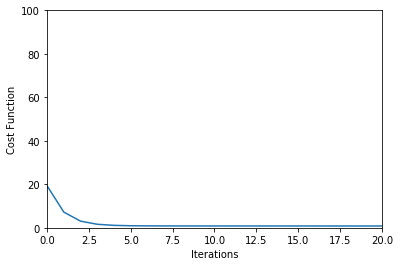

In [26]:

# import matplotlib.pyplot as plt
# import numpy as pd
# %matplotlib inline
# theta, error = LinRegBatchGradientDescent(X_b,y,100,0.1)
# print(theta)
# plt.plot(np.arange(error.shape[0]) ,error)
# plt.ylabel('Cost Function')
# plt.xlabel('Iterations')
# plt.axis([0,20,0,100])



________________________________

# ideias de modelos
usando todas as features
<br>
&nbsp;&nbsp;normal
&nbsp;&nbsp;ao quadrado
<br>
tirando as features que nao aparentam influenciar
<br>
&nbsp;&nbsp;normal
&nbsp;&nbsp; ao quadrado


### MODELO 1 : Modelo com todas as features

In [59]:
from sklearn.metrics import mean_squared_error

x1,y1 = prepareSet(diamond_data)
indices_generator = generate_sets(x1)
theta1 = np.zeros((5,1))
error1 = np.zeros((5,1))
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x1_train = x1[train_index]
    y1_train = y1[train_index]
    x1_val = x1[val_index]
    y1_val = y1[val_index]
    
#   supondo que isso funcione   
#   theta1[i]= LinRegBatchGradientDescent(x1_train,y1_train,100,0.1)

    #error from validation
    y1_predict = x1_val.dot(theta1[i])
    error1[i] = mean_squared_error(y1_val, y1_predict)
    i += 1
    

ValueError: shapes (9170,10) and (1,) not aligned: 10 (dim 1) != 1 (dim 0)

-------------------------------------------------------------------------------------------

### Modelo 2: sem as features que nao aparentam ter significado no resultado (table,depth,clarity,color,cut)

In [61]:
diamond_data.head()

,carat,cut,color,clarity,x,y,z,depth,table,price
0,1.62,4,1,3,7.53,7.58,4.69,6.21,5.5,10501
1,0.30,3,3,2,4.39,4.35,2.57,5.88,6.0,574
2,1.37,4,4,4,7.28,7.22,4.32,5.96,5.7,11649
3,0.33,0,2,5,4.40,4.32,2.84,6.51,5.9,922
4,0.32,2,4,3,4.43,4.48,2.62,5.88,6.2,602


In [69]:
from sklearn.metrics import mean_squared_error

data = diamond_data[['x', 'y', 'z', 'carat', 'price']]
x2,y2 = prepareSet(data)
indices_generator = generate_sets(x2)
theta2 = np.zeros((5,1))
error2 = np.zeros((5,1))
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x2_train = x2[train_index]
    y2_train = y2[train_index]
    x2_val = x2[val_index]
    y2_val = y2[val_index]
    
#   supondo que isso funcione   
#   theta2[i]= LinRegBatchGradientDescent(x2_train,y2_train,100,0.1)

    #error from validation
    y2_predict = x2_val.dot(theta2[i])
    error2[i] = mean_squared_error(y2_val, y2_predict)
    i += 1

,x,y,z,carat,price
0,7.53,7.58,4.69,1.62,10501
1,4.39,4.35,2.57,0.30,574
2,7.28,7.22,4.32,1.37,11649
3,4.40,4.32,2.84,0.33,922
4,4.43,4.48,2.62,0.32,602


### Modelo 3 : sem as features que nao aparentam ter significado no resultado, so que com elas ao quadrado

In [76]:
from sklearn.metrics import mean_squared_error

data = diamond_data[['x', 'y', 'z', 'carat', 'price']]
data.insert(loc=0, column='x2', value = data['x']**2)
data.insert(loc=0, column='y2', value = data['y']**2)
data.insert(loc=0, column='z2', value = data['z']**2)
data.insert(loc=0, column='carat2', value = data['carat']**2)
data.head()
x3,y3 = prepareSet(data)
indices_generator = generate_sets(x3)
theta3 = np.zeros((5,1))
error3 = np.zeros((5,1))
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x3_train = x3[train_index]
    y3_train = y3[train_index]
    x3_val = x3[val_index]
    y3_val = y3[val_index]
    
#   supondo que isso funcione   
#   theta3[i]= LinRegBatchGradientDescent(x3_train,y3_train,100,0.1)

    #error from validation
    y3_predict = x3_val.dot(theta3[i])
    error3[i] = mean_squared_error(y3_val, y3_predict)
    i += 1

ValueError: shapes (9170,9) and (1,) not aligned: 9 (dim 1) != 1 (dim 0)

### Modelo 4: todas as features com tudo ao cubo

In [89]:
from sklearn.metrics import mean_squared_error

x4,y4 = prepareSet(diamond_data)
x4 = np.hstack([x4,x4**2,x4**3])
indices_generator = generate_sets(x4)
theta4 = np.zeros((5,1))
error4 = np.zeros((5,1))
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x4_train = x4[train_index]
    y4_train = y4[train_index]
    x4_val = x4[val_index]
    y4_val = y4[val_index]
    
#   supondo que isso funcione   
#   theta4[i]= LinRegBatchGradientDescent(x4_train,y4_train,100,0.1)

    #error from validation
    y4_predict = x4_val.dot(theta4[i])
    error4[i] = mean_squared_error(y4_val, y4_predict)
    i += 1

[  1.         1.62       4.         1.         3.         7.53
   7.58       4.69       6.21       5.5        1.         2.6244
  16.         1.         9.        56.7009    57.4564    21.9961
  38.5641    30.25       1.         4.251528  64.         1.
  27.       426.957777 435.519512 103.161709 239.483061 166.375   ] [1.   1.62 4.   1.   3.   7.53 7.58 4.69 6.21 5.5 ]
